In [128]:
import sys
path = ".."
if path not in sys.path:
    sys.path.insert(0, path)

In [129]:
import numpy as np
from data_retrieval import lipade_groundtruth
from clustering import getPredictionFromThreshold
import evaluators
import csv

corpus = "lipade_groundtruth"
type = "image"
method = "sift_proportional"

distancePath = "../representation/" + type + "/results/distance/" + corpus + "/" + method + ".npy"
distance = np.load(distancePath)

In [130]:
_,_,y = lipade_groundtruth.getDataset()

In [131]:
thresholds_precision = 1000
thresholds = np.linspace(0, 1, thresholds_precision) # ((0.95, 1) for sift-absolute)

precisions, recalls, f1s = evaluators.p_r_f1_byThresholds(thresholds, distance, y)

Thresholds: 100%|██████████| 1000/1000 [00:10<00:00, 91.08it/s]


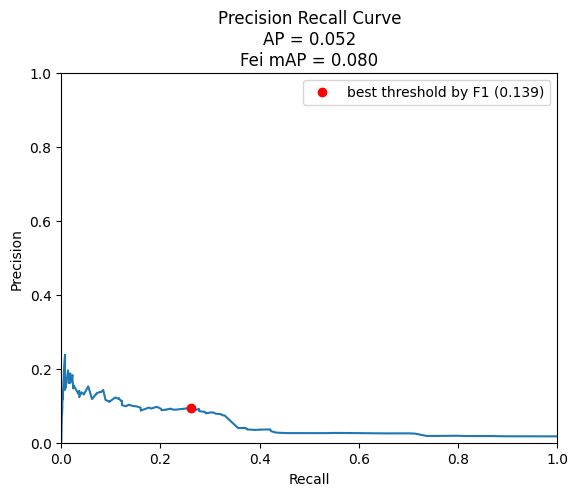

In [132]:
AP, bestThresholdIndex = evaluators.pr_curve(precisions, recalls, f1s, other=("Fei mAP", evaluators.fei_mAP(y, distance)), save="evaluation/" + corpus + "/" + method + ".png")

In [133]:
thresholdsClass = np.linspace(0, 1, int(thresholds_precision / 10)) # ((0.95, 1) for sift-absolute)
precisions_per_class, recalls_per_class = evaluators.p_r_class_byThresholds(thresholdsClass, distance, y)

Thresholds: 100%|██████████| 100/100 [00:44<00:00,  2.26it/s]


In [134]:
with open('evaluation/' + corpus + '/map_a.csv', mode='r') as infile:
    reader = csv.reader(infile)
    map_dict = {rows[0]:rows[1] for rows in reader}

map_dict[method] = "{:.3f}".format(evaluators.goncalves_mAP(precisions_per_class, recalls_per_class))

In [135]:
with open('evaluation/' + corpus + '/map_a.csv', mode='w') as outfile:
    res_dict = csv.writer(outfile)
    res_dict.writerows(map_dict.items())

In [136]:
bestPredictedY = getPredictionFromThreshold(thresholds[bestThresholdIndex], distance)
np.save("clusters/" + corpus + "/" + method + ".npy", bestPredictedY)